In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("final_df2.csv")
df.head()

C:\Users\shive\AppData\Local\Temp\ipykernel_16140\1036301286.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_df2.csv")


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


## Converting all Into integers

In [3]:
df['Dst Port'] = pd.to_numeric(df['Dst Port'], errors='coerce')
df['Flow Duration'] = pd.to_numeric(df['Flow Duration'], errors='coerce')
df['Flow IAT Mean'] = pd.to_numeric(df['Flow IAT Mean'], errors='coerce')
df['Flow IAT Max'] = pd.to_numeric(df['Flow IAT Max'], errors='coerce')
df['Flow IAT Min'] = pd.to_numeric(df['Flow IAT Min'], errors='coerce')
df['Fwd IAT Min'] = pd.to_numeric(df['Fwd IAT Min'], errors='coerce')
df['Bwd IAT Min'] = pd.to_numeric(df['Bwd IAT Min'], errors='coerce')
df['Fwd Header Len'] = pd.to_numeric(df['Fwd Header Len'], errors='coerce')

df['Fwd Pkts/s'] = pd.to_numeric(df['Fwd Pkts/s'], errors='coerce')
df['Bwd Pkts/s'] = pd.to_numeric(df['Bwd Pkts/s'], errors='coerce')
df['ACK Flag Cnt'] = pd.to_numeric(df['ACK Flag Cnt'], errors='coerce')
df['Init Fwd Win Byts'] = pd.to_numeric(df['Init Fwd Win Byts'], errors='coerce')
df['Fwd Seg Size Min'] = pd.to_numeric(df['Fwd Seg Size Min'], errors='coerce')

In [4]:
df.dtypes

Dst Port         float64
Protocol          object
Timestamp         object
Flow Duration    float64
Tot Fwd Pkts      object
                  ...   
Idle Mean         object
Idle Std          object
Idle Max          object
Idle Min          object
Label             object
Length: 80, dtype: object

In [5]:
df['Flow Pkts/s'] = pd.to_numeric(df['Flow Pkts/s'], errors='coerce')
df['Init Bwd Win Byts'] = pd.to_numeric(df['Init Bwd Win Byts'], errors='coerce')

## Analyzing Which Attacks took more place

In [6]:
not_benign = df.loc[df["Label"]!="Benign"]
not_benign_ = not_benign.loc[not_benign["Label"]!="Label"]

C:\Users\shive\AppData\Local\Temp\ipykernel_16140\3308971140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=not_benign_,x='Label',palette="coolwarm", order = label_order)


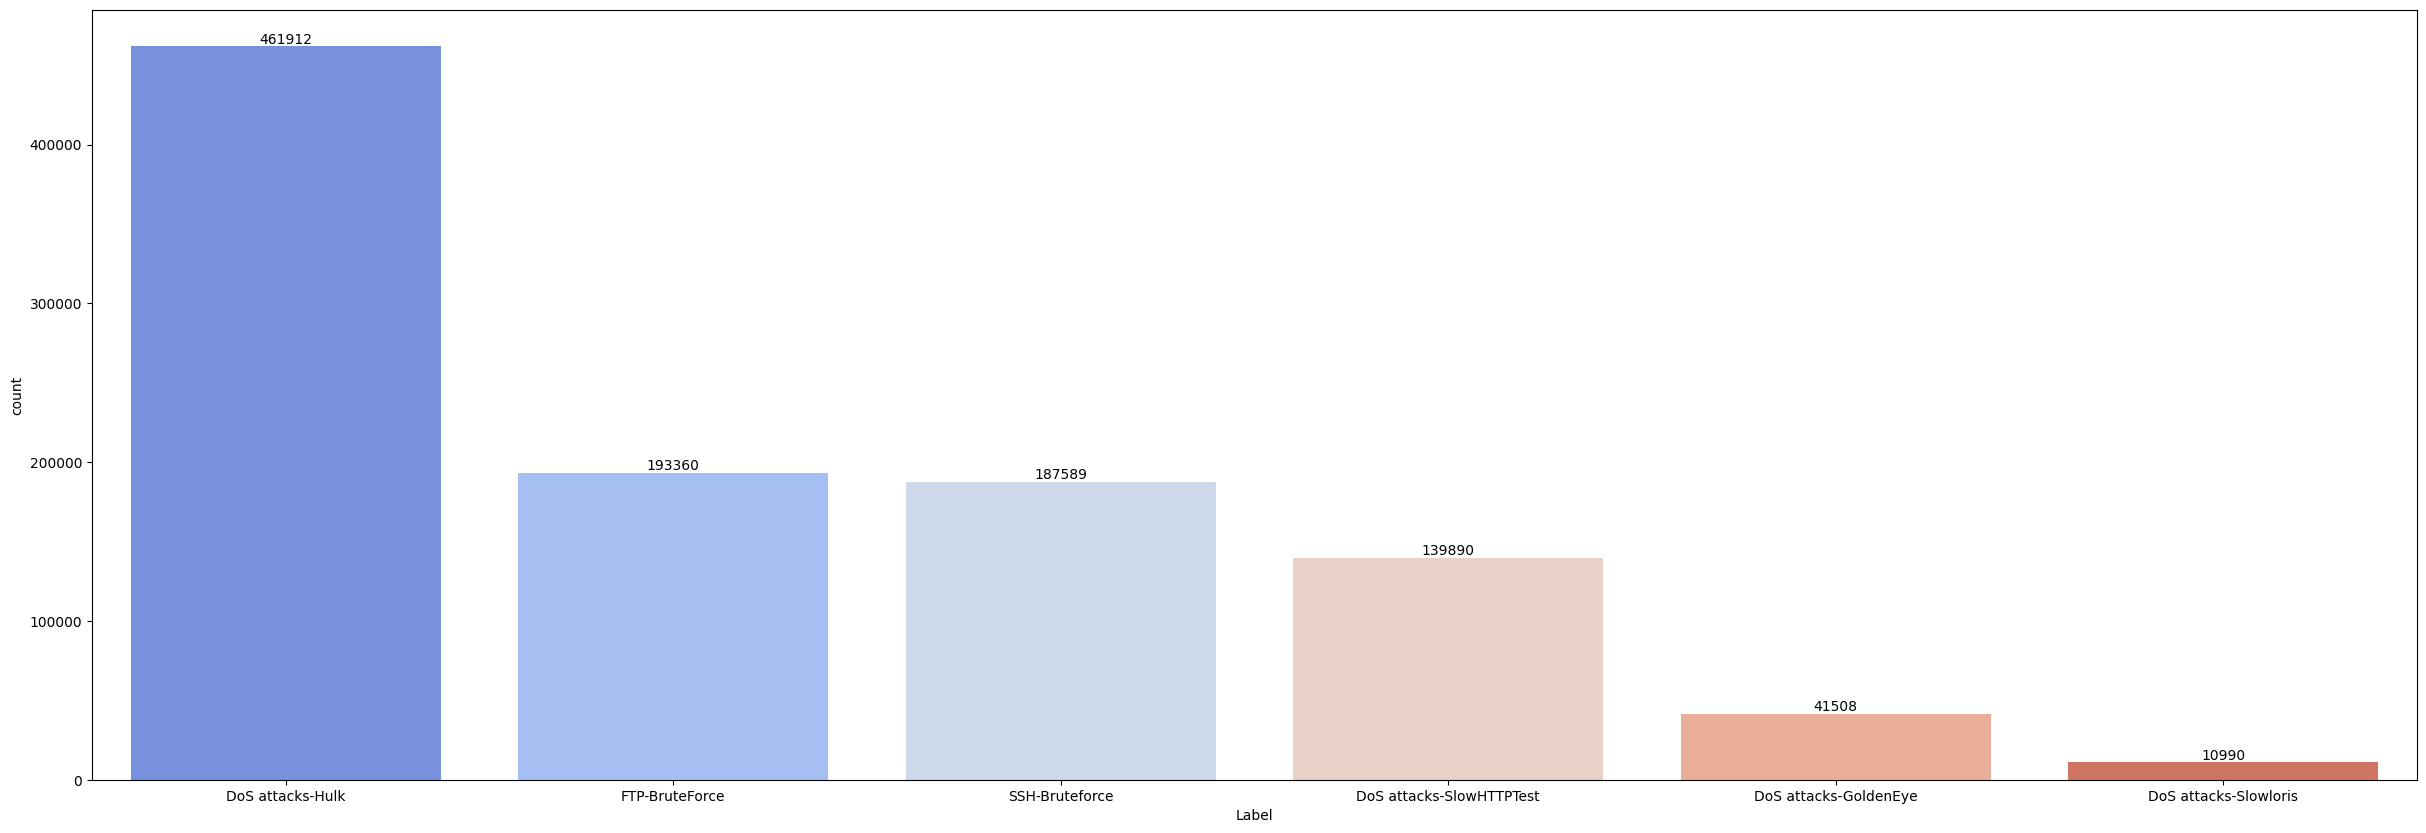

In [7]:
import seaborn as sns
plt.figure(figsize=(30,10))
label_order = not_benign_['Label'].value_counts(ascending=False).index
ax = sns.countplot(data=not_benign_,x='Label',palette="coolwarm", order = label_order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # The count value
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text
                ha='center', va='bottom')



In [7]:
ddos_hoic = df.loc[df["Label"]=="DDOS attack-HOIC"]
ddos_hoic.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
948159,80.0,21/02/2018 02:11:08,31105.0,225.044205,5184.166667,16981.0,3.0,268.0,1939.0,72.0,96.447516,128.596689,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948160,80.0,21/02/2018 02:11:08,30092.0,232.619965,5015.333333,17119.0,4.0,283.0,1846.0,72.0,99.694271,132.925694,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948161,80.0,21/02/2018 02:11:08,33993.0,205.924749,5665.500000,17112.0,3.0,455.0,1831.0,72.0,88.253464,117.671285,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948162,80.0,21/02/2018 02:11:08,33099.0,211.486752,5516.500000,17144.0,3.0,281.0,1818.0,72.0,90.637179,120.849572,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948163,80.0,21/02/2018 02:11:08,32149.0,217.736166,5358.166667,17177.0,3.0,308.0,1807.0,72.0,93.315500,124.420666,0.0,65535.0,219.0,20.0,DDOS attack-HOIC


Initial Forward Window Bytes (Init Fwd Win Byts) is the size (in bytes) of the initial window of data sent in the forward direction (from the source to the destination) at the start of a connection in TCP/IP communication.

Window Size: In TCP (Transmission Control Protocol), the window size determines how much data can be sent before requiring an acknowledgment. A larger window size allows for more data to be in transit without waiting for confirmation from the recipient.

Forward Direction: Refers to the traffic going from the client (source) to the server (destination) in a network session.

If you encounter negative values for Init Bwd Win Byts (or Init Fwd Win Byts), it's likely due to one of the following issues:

Data Corruption: There may be an issue with how the data was captured or processed.
Bug in the Data Collection Tool: The tool that collected the network flow data might have a bug or misconfiguration.
Overflow/Underflow Error: If the window size field is incorrectly interpreted (e.g., from an unsigned integer to a signed one), an overflow could result in negative values.

In [19]:
ddos_hoic["Flow Pkts/s"].max()

1000000.0

In [20]:
flow_hoic = ddos_hoic.loc[ddos_hoic["Flow Pkts/s"] == 1000000.0]
flow_hoic.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
1967071,80.0,21/02/2018 02:32:53,2.0,1000000.0,2.0,2.0,2.0,2.0,0.0,40.0,1000000.0,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
1969059,80.0,21/02/2018 02:32:56,2.0,1000000.0,2.0,2.0,2.0,2.0,0.0,40.0,1000000.0,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
1988963,80.0,21/02/2018 02:33:24,2.0,1000000.0,2.0,2.0,2.0,2.0,0.0,40.0,1000000.0,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC


## Long Packets Sent For really Short Duration

In [21]:
ddos_hoic["Flow Pkts/s"].min()

22.59606151

In [22]:
ddos_hoic.loc[ddos_hoic["Flow Pkts/s"] == 22.59606151]

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
1852528,80.0,21/02/2018 02:30:11,88511.0,22.596062,88511.0,88511.0,88511.0,88511.0,0.0,40.0,22.596062,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC


## Small Packets being sent for longer Duration

In [23]:
ddos_hoic["Flow Pkts/s"].mean()

948.3727530695418

In [27]:
ddos_hoic.loc[ddos_hoic["Flow Pkts/s"] <= 948.3727530695418].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
948159,80.0,21/02/2018 02:11:08,31105.0,225.044205,5184.166667,16981.0,3.0,268.0,1939.0,72.0,96.447516,128.596689,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948160,80.0,21/02/2018 02:11:08,30092.0,232.619965,5015.333333,17119.0,4.0,283.0,1846.0,72.0,99.694271,132.925694,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948161,80.0,21/02/2018 02:11:08,33993.0,205.924749,5665.500000,17112.0,3.0,455.0,1831.0,72.0,88.253464,117.671285,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948162,80.0,21/02/2018 02:11:08,33099.0,211.486752,5516.500000,17144.0,3.0,281.0,1818.0,72.0,90.637179,120.849572,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948163,80.0,21/02/2018 02:11:08,32149.0,217.736166,5358.166667,17177.0,3.0,308.0,1807.0,72.0,93.315500,124.420666,0.0,65535.0,219.0,20.0,DDOS attack-HOIC


## Analyzing the max and min Forward packets

In [32]:
print("Min",ddos_hoic["Fwd Pkts/s"].min())

Min 22.59606151


In [39]:
ddos_hoic.loc[ddos_hoic["Fwd Pkts/s"] == 22.59606151].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
1852528,80.0,21/02/2018 02:30:11,88511.0,22.596062,88511.0,88511.0,88511.0,88511.0,0.0,40.0,22.596062,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC


In [40]:
print("Max",ddos_hoic["Fwd Pkts/s"].max())

Max 1000000.0


In [41]:
ddos_hoic.loc[ddos_hoic["Fwd Pkts/s"] == 1000000.0].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
1967071,80.0,21/02/2018 02:32:53,2.0,1000000.0,2.0,2.0,2.0,2.0,0.0,40.0,1000000.0,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
1969059,80.0,21/02/2018 02:32:56,2.0,1000000.0,2.0,2.0,2.0,2.0,0.0,40.0,1000000.0,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
1988963,80.0,21/02/2018 02:33:24,2.0,1000000.0,2.0,2.0,2.0,2.0,0.0,40.0,1000000.0,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC


In [28]:
print("Mean",ddos_hoic["Fwd Pkts/s"].mean())

Mean 748.9725734698477


In [43]:
ddos_hoic.loc[ddos_hoic["Fwd Pkts/s"] <= 748.9725734698477].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
948159,80.0,21/02/2018 02:11:08,31105.0,225.044205,5184.166667,16981.0,3.0,268.0,1939.0,72.0,96.447516,128.596689,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948160,80.0,21/02/2018 02:11:08,30092.0,232.619965,5015.333333,17119.0,4.0,283.0,1846.0,72.0,99.694271,132.925694,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948161,80.0,21/02/2018 02:11:08,33993.0,205.924749,5665.500000,17112.0,3.0,455.0,1831.0,72.0,88.253464,117.671285,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948162,80.0,21/02/2018 02:11:08,33099.0,211.486752,5516.500000,17144.0,3.0,281.0,1818.0,72.0,90.637179,120.849572,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948163,80.0,21/02/2018 02:11:08,32149.0,217.736166,5358.166667,17177.0,3.0,308.0,1807.0,72.0,93.315500,124.420666,0.0,65535.0,219.0,20.0,DDOS attack-HOIC


## Analyzing the max and min Backward packets

In [33]:
print("Min",ddos_hoic["Bwd Pkts/s"].min())

Min 0.0


In [38]:
ddos_hoic.loc[ddos_hoic["Bwd Pkts/s"] == 0.0].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
948164,80.0,21/02/2018 02:11:08,27072.0,73.877069,27072.0,27072.0,27072.0,27072.0,0.0,40.0,73.877069,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
948165,80.0,21/02/2018 02:11:08,27127.0,73.727283,27127.0,27127.0,27127.0,27127.0,0.0,40.0,73.727283,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
948166,80.0,21/02/2018 02:11:08,27150.0,73.664825,27150.0,27150.0,27150.0,27150.0,0.0,40.0,73.664825,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
948167,80.0,21/02/2018 02:11:08,27226.0,73.459193,27226.0,27226.0,27226.0,27226.0,0.0,40.0,73.459193,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC
948168,80.0,21/02/2018 02:11:08,27377.0,73.054023,27377.0,27377.0,27377.0,27377.0,0.0,40.0,73.054023,0.0,1.0,32738.0,-1.0,20.0,DDOS attack-HOIC


In [34]:
print("Max",ddos_hoic["Bwd Pkts/s"].max())

Max 5997.001499


In [37]:
ddos_hoic.loc[ddos_hoic["Bwd Pkts/s"] == 5997.001499].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
1140999,80.0,21/02/2018 02:15:14,667.0,10494.75262,111.166667,338.0,6.0,97.0,22.0,72.0,4497.751124,5997.001499,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
1191979,80.0,21/02/2018 02:16:18,667.0,10494.75262,111.166667,337.0,6.0,91.0,27.0,72.0,4497.751124,5997.001499,0.0,65535.0,219.0,20.0,DDOS attack-HOIC


In [35]:
print("Mean",ddos_hoic["Bwd Pkts/s"].mean())

Mean 199.40017959897392


In [36]:
ddos_hoic.loc[ddos_hoic["Bwd Pkts/s"] <= 199.40017959897392].head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
948159,80.0,21/02/2018 02:11:08,31105.0,225.044205,5184.166667,16981.0,3.0,268.0,1939.0,72.0,96.447516,128.596689,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948160,80.0,21/02/2018 02:11:08,30092.0,232.619965,5015.333333,17119.0,4.0,283.0,1846.0,72.0,99.694271,132.925694,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948161,80.0,21/02/2018 02:11:08,33993.0,205.924749,5665.500000,17112.0,3.0,455.0,1831.0,72.0,88.253464,117.671285,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948162,80.0,21/02/2018 02:11:08,33099.0,211.486752,5516.500000,17144.0,3.0,281.0,1818.0,72.0,90.637179,120.849572,0.0,65535.0,219.0,20.0,DDOS attack-HOIC
948163,80.0,21/02/2018 02:11:08,32149.0,217.736166,5358.166667,17177.0,3.0,308.0,1807.0,72.0,93.315500,124.420666,0.0,65535.0,219.0,20.0,DDOS attack-HOIC


## In Complete analysis we can Notice that the forward packets are sent less but if Sent they are bigger in size. The Scenario is oposite in Backward packets

## DDoS attacks-LOIC-HTTP

In [44]:
ddos_loic = df.loc[df["Label"]=="DDoS attacks-LOIC-HTTP"]
ddos_loic.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
8284317,80.0,20/02/2018 10:13:54,3904.0,1793.032787,650.666667,2937.0,27.0,373.0,66.0,72.0,768.442623,1024.590164,0.0,8192.0,211.0,20.0,DDoS attacks-LOIC-HTTP
8284318,80.0,20/02/2018 10:13:54,762.0,9186.351706,127.000000,387.0,2.0,2.0,32.0,72.0,3937.007874,5249.343832,0.0,8192.0,211.0,20.0,DDoS attacks-LOIC-HTTP
8284319,80.0,20/02/2018 10:13:54,726.0,9641.873278,121.000000,363.0,2.0,2.0,33.0,72.0,4132.231405,5509.641873,0.0,8192.0,211.0,20.0,DDoS attacks-LOIC-HTTP
8284320,80.0,20/02/2018 10:13:54,556.0,12589.928060,92.666667,292.0,2.0,2.0,26.0,72.0,5395.683453,7194.244604,0.0,8192.0,211.0,20.0,DDoS attacks-LOIC-HTTP
8284321,80.0,20/02/2018 10:13:54,916.0,7641.921397,152.666667,565.0,3.0,3.0,32.0,72.0,3275.109170,4366.812227,0.0,8192.0,211.0,20.0,DDoS attacks-LOIC-HTTP


## Dos Hulk

In [45]:
dos_hulk = df.loc[df["Label"]=="DoS attacks-Hulk"]
dos_hulk.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
2084504,80.0,16/02/2018 01:45:27,1793.0,3904.071389,298.833333,1351.0,17.0,31.0,55.0,104.0,1673.173452,2230.897936,0.0,26883.0,219.0,32.0,DoS attacks-Hulk
2084505,80.0,16/02/2018 01:45:27,1720.0,4069.767442,286.666667,1394.0,6.0,16.0,30.0,104.0,1744.186047,2325.581395,0.0,26883.0,219.0,32.0,DoS attacks-Hulk
2084506,80.0,16/02/2018 01:45:27,191.0,10471.204190,191.000000,191.0,191.0,191.0,0.0,64.0,10471.204190,0.000000,1.0,225.0,-1.0,32.0,DoS attacks-Hulk
2084507,80.0,16/02/2018 01:45:27,912.0,7675.438596,152.000000,545.0,8.0,45.0,50.0,104.0,3289.473684,4385.964912,0.0,26883.0,219.0,32.0,DoS attacks-Hulk
2084508,80.0,16/02/2018 01:45:27,1869.0,3745.318352,311.500000,1264.0,7.0,262.0,28.0,104.0,1605.136437,2140.181915,0.0,26883.0,219.0,32.0,DoS attacks-Hulk


## FTP Brute Force Attacks

In [51]:
FTP = df.loc[df["Label"]=="FTP-BruteForce"]
FTP.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
4090048,21.0,14/02/2018 10:33:26,19.0,105263.157895,19.0,19.0,19.0,0.0,0.0,40.0,52631.578947,52631.578947,0.0,26883.0,0.0,40.0,FTP-BruteForce
4090049,21.0,14/02/2018 10:33:26,3.0,666666.666667,3.0,3.0,3.0,0.0,0.0,40.0,333333.333333,333333.333333,0.0,26883.0,0.0,40.0,FTP-BruteForce
4090050,21.0,14/02/2018 10:33:26,3.0,666666.666667,3.0,3.0,3.0,0.0,0.0,40.0,333333.333333,333333.333333,0.0,26883.0,0.0,40.0,FTP-BruteForce
4090051,21.0,14/02/2018 10:33:26,2.0,1000000.000000,2.0,2.0,2.0,0.0,0.0,40.0,500000.000000,500000.000000,0.0,26883.0,0.0,40.0,FTP-BruteForce
4090052,21.0,14/02/2018 10:33:26,2.0,1000000.000000,2.0,2.0,2.0,0.0,0.0,40.0,500000.000000,500000.000000,0.0,26883.0,0.0,40.0,FTP-BruteForce


## In FTP Bruteforce Attack the exact same number of Forward packets and Backward packets are sent 

## SSH Brute force

In [49]:
SSH = df.loc[df["Label"]=="SSH-Bruteforce"]
SSH.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
4269385,22.0,14/02/2018 02:01:50,555650.0,79.186538,12922.093023,231137.0,4.0,276.0,15.0,712.0,39.593269,39.593269,0.0,26883.0,230.0,32.0,SSH-Bruteforce
4269386,22.0,14/02/2018 02:01:50,560585.0,78.489435,13036.860465,317258.0,5.0,254.0,13.0,712.0,39.244718,39.244718,0.0,26883.0,230.0,32.0,SSH-Bruteforce
4269387,22.0,14/02/2018 02:01:50,530547.0,79.163580,12940.170732,271409.0,6.0,176.0,18.0,712.0,41.466637,37.696943,0.0,26883.0,230.0,32.0,SSH-Bruteforce
4269388,22.0,14/02/2018 02:01:50,533609.0,80.583348,12704.976190,238603.0,4.0,201.0,13.0,712.0,41.228690,39.354659,0.0,26883.0,230.0,32.0,SSH-Bruteforce
4269389,22.0,14/02/2018 02:01:50,565469.0,76.043072,13463.547619,276821.0,3.0,250.0,14.0,712.0,38.905758,37.137314,0.0,26883.0,230.0,32.0,SSH-Bruteforce


## In SSH Bruteforce Attack the almost same number of Forward packets and Backward packets are sent

In [53]:
Bot = df.loc[df["Label"]=="Bot"]
Bot.head()

,Dst Port,Timestamp,Flow Duration,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
3042613,8080.0,02/03/2018 10:17:07,16079.0,435.350457,2679.833333,15084.0,1.0,58.0,1.0,72.0,186.578767,248.771690,0.0,8192.0,219.0,20.0,Bot
3042614,8080.0,02/03/2018 10:17:07,577.0,3466.204506,577.000000,577.0,577.0,577.0,0.0,40.0,3466.204506,0.000000,1.0,2052.0,-1.0,20.0,Bot
3042615,8080.0,02/03/2018 10:17:09,10279.0,681.000097,1713.166667,9243.0,20.0,51.0,117.0,72.0,291.857185,389.142913,0.0,8192.0,219.0,20.0,Bot
3042616,8080.0,02/03/2018 10:17:09,457.0,4376.367615,457.000000,457.0,457.0,457.0,0.0,40.0,4376.367615,0.000000,1.0,2052.0,-1.0,20.0,Bot
3042619,8080.0,02/03/2018 10:17:11,10271.0,681.530523,1711.833333,9434.0,20.0,47.0,41.0,72.0,292.084510,389.446013,0.0,8192.0,219.0,20.0,Bot
